![](http://thecads.org/wp-content/uploads/2017/02/adax_logo.jpg)
# Module 4: Data Manipulation and Analysis with Pandas

![](http://pandas.pydata.org/_static/pandas_logo.png)
[Pandas](http://pandas.pydata.org/) is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. Pandas is free software released under the three-clause BSD license. The name is derived from the term _panel data_, an econometrics term for multidimensional structured data sets.

#### Contents
*[Continued from part 4a]*

* [Analyzing Data](#Analyzing-Data)
    * [Groupby](#Groupby) 
    * [MultiIndices](#MultiIndex)
    * [Pivot Tables](#Pivot-Tables) like Excel!
* [Example Analysis](#Example-Analysis)
* [Presenting Data](#Presenting-Data)
* [Summary](#Summary)

* [Other Topics](#Other-Topics)
    * [Merging DataFrames](#Merging-DataFrames)
    * [Apply Method](#Apply-method)
    * [Scales](#Scales)
    * [Dates Functionality](#Date-Functionality-in-Pandas)

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Analyzing Data

The rest of this worksheet will use a single example, which contains data for customer counts per date at different store locations each week.  

In [122]:
# Function to generate test data
def CreateDataSet(Number=1):
    Output = []
    for i in range(Number):
        # Create a weekly (mondays) date range
        rng = pd.date_range(start='1/1/2013', end='12/31/2016', freq='W-MON')
        
        # Create random data
        data = np.random.randint(low=25,high=1000,size=len(rng))
        
        # Status pool
        status = [1,2,3]
        
        # Make a random list of statuses
        random_status = [status[np.random.randint(low=0,high=len(status))] for i in range(len(rng))]
        
        # State pool
        location = ['Bangsar','Ampang','Petaling Jaya','Cheras']
        
        # Make a random list of states 
        random_location = [location[np.random.randint(low=0,high=len(location))] for i in range(len(rng))]

        Output.extend(list(zip(random_location, random_status, data, rng)))
        
    return Output

In [123]:
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['location','Status','CustomerCount','StatusDate'])
df.info()
df.describe()
df.index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 4 columns):
location         832 non-null object
Status           832 non-null int64
CustomerCount    832 non-null int64
StatusDate       832 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.1+ KB


RangeIndex(start=0, stop=832, step=1)

In [124]:
df.describe()


,Status,CustomerCount
count,832.000000,832.000000
mean,2.036058,520.979567
std,0.803810,283.771176
min,1.000000,25.000000
25%,1.000000,274.000000
50%,2.000000,531.000000
75%,3.000000,775.500000
max,3.000000,998.000000


We are now going to save this dataframe into an Excel file, to then bring it back to a dataframe. We simply do this to practice reading and writing to Excel files.  

We do not write the index values of the dataframe to the Excel file, since they are not meant to be part of our initial test data set.

In [125]:
# Save results to Excel
df.to_excel('Customers.xlsx', index=False)
print('Done')

Done


In [126]:
# Location of file
Location = r'Customers.xlsx'

# Parse a specific sheet - look what we did here!
df = pd.read_excel(Location, 0, index_col='StatusDate')
df.dtypes

location         object
Status            int64
CustomerCount     int64
dtype: object

In [127]:
# Return the index of df
df.index

DatetimeIndex(['2013-01-07', '2013-01-14', '2013-01-21', '2013-01-28',
               '2013-02-04', '2013-02-11', '2013-02-18', '2013-02-25',
               '2013-03-04', '2013-03-11',
               ...
               '2016-10-24', '2016-10-31', '2016-11-07', '2016-11-14',
               '2016-11-21', '2016-11-28', '2016-12-05', '2016-12-12',
               '2016-12-19', '2016-12-26'],
              dtype='datetime64[ns]', name='StatusDate', length=832, freq=None)

In [128]:
df.head()

,location,Status,CustomerCount
StatusDate,,,
2013-01-07,Bangsar,1,669
2013-01-14,Petaling Jaya,2,142
2013-01-21,Ampang,3,253
2013-01-28,Petaling Jaya,1,770
2013-02-04,Petaling Jaya,3,39


In [129]:
# Let's pretend that status == only includes the people who 
# bought something. 
mask = df['Status'] == 1
print (df.head())
df = df[mask]
df.shape

                 location  Status  CustomerCount
StatusDate                                      
2013-01-07        Bangsar       1            669
2013-01-14  Petaling Jaya       2            142
2013-01-21         Ampang       3            253
2013-01-28  Petaling Jaya       1            770
2013-02-04  Petaling Jaya       3             39


(254, 3)

At this point we may want to graph the data to check for any outliers or inconsistencies in the data. We will be using the ***plot()*** attribute of the dataframe.  

As you can see from the graph below it is not very conclusive and is probably a sign that we need to perform some more data preparation.

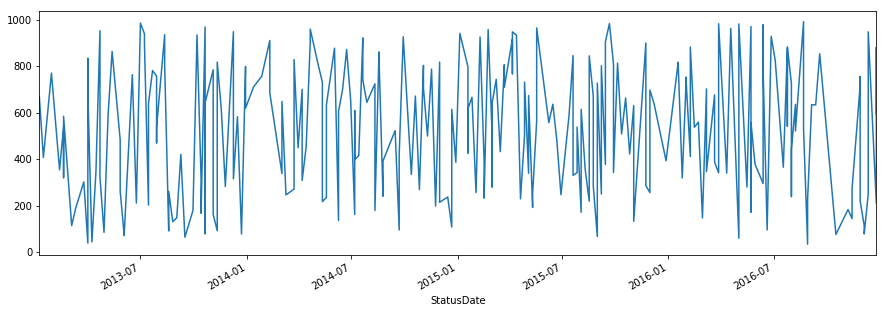

In [130]:
df['CustomerCount'].plot(figsize=(15,5))
plt.show()

If we take a look at the data, we begin to realize that there are multiple values for the same location, StatusDate, and Status combination. It is possible that this means the data you are working with is dirty/bad/inaccurate, but we will assume otherwise. We can assume this data set is a subset of a bigger data set and if we simply add the values in the ***CustomerCount*** column per location, StatusDate, and Status we will get the ***Total Customer Count*** per day.  

In [131]:
sortdf = df[df['location']=='Bangsar'].sort_index(axis=0) #axis 0 - sort horizontally
sortdf.head(10)

,location,Status,CustomerCount
StatusDate,,,
2013-01-07,Bangsar,1,669
2013-02-18,Bangsar,1,539
2013-04-01,Bangsar,1,39
2013-06-17,Bangsar,1,763
2013-06-24,Bangsar,1,211
2013-07-15,Bangsar,1,202
2013-07-22,Bangsar,1,781
2013-08-12,Bangsar,1,805
2013-09-02,Bangsar,1,148


### Groupby
Our task is now to create a new dataframe that compresses the data so we have daily customer counts per location and StatusDate. We can ignore the Status column since the values in this column are of value *1*. To accomplish this we will use the dataframe's functions ***groupby*** and ***sum()***.  

Note that we are using **reset_index** . If we did not, we would not have been able to group by both the location and the StatusDate since the groupby function expects only columns as inputs. The **reset_index** function will bring the index ***StatusDate*** back to a column in the dataframe. 

In [132]:
# Group by State and StatusDate
Daily = df.reset_index().groupby(['location','StatusDate']).sum() #groupby kena follow by operation(sum,min etc.)
Daily.head(20)

Status  CustomerCount
location StatusDate                       
Ampang   2013-03-11       1            189
         2013-04-01       1            833
         2013-04-08       1             44
         2013-04-22       1            321
         2013-05-06       1            589
         2013-05-13       1            863
         2013-06-03       2            149
         2013-07-08       1            894
         2013-08-12       1            935
         2013-10-21       2            721
         2013-11-04       1            162
         2013-11-11       1             92
         2014-02-10       1            910
         2014-03-24       1            271
         2014-03-31       1            449
         2014-04-21       1            906
         2014-07-21       1            921
         2014-08-11       1            581
         2014-08-18       1            861
         2014-09-22       1             95

The ***location*** and ***StatusDate*** columns are automatically placed in the index of the ***Daily*** dataframe. You can think of the ***index*** as the primary key of a database table but without the constraint of having unique values. Columns in the index as you will see allow us to easily select, plot, and perform calculations on the data.  

Below is how we can delete the ***Status*** column.

In [133]:
del Daily['Status']
Daily.head() #another way is using df.drop(column)

CustomerCount
location StatusDate               
Ampang   2013-03-11            189
         2013-04-01            833
         2013-04-08             44
         2013-04-22            321
         2013-05-06            589

In [134]:
# Try another groupby!

### MultiIndex

In [135]:
# What is the index of the Daily dataframe
Daily.index

MultiIndex(levels=[['Ampang', 'Bangsar', 'Cheras', 'Petaling Jaya'], [2013-01-07 00:00:00, 2013-01-14 00:00:00, 2013-01-28 00:00:00, 2013-02-11 00:00:00, 2013-02-18 00:00:00, 2013-03-04 00:00:00, 2013-03-11 00:00:00, 2013-03-25 00:00:00, 2013-04-01 00:00:00, 2013-04-08 00:00:00, 2013-04-15 00:00:00, 2013-04-22 00:00:00, 2013-04-29 00:00:00, 2013-05-06 00:00:00, 2013-05-13 00:00:00, 2013-05-27 00:00:00, 2013-06-03 00:00:00, 2013-06-17 00:00:00, 2013-06-24 00:00:00, 2013-07-01 00:00:00, 2013-07-08 00:00:00, 2013-07-15 00:00:00, 2013-07-22 00:00:00, 2013-07-29 00:00:00, 2013-08-12 00:00:00, 2013-08-19 00:00:00, 2013-08-26 00:00:00, 2013-09-02 00:00:00, 2013-09-09 00:00:00, 2013-09-16 00:00:00, 2013-09-30 00:00:00, 2013-10-07 00:00:00, 2013-10-14 00:00:00, 2013-10-21 00:00:00, 2013-11-04 00:00:00, 2013-11-11 00:00:00, 2013-11-18 00:00:00, 2013-11-25 00:00:00, 2013-12-02 00:00:00, 2013-12-09 00:00:00, 2013-12-16 00:00:00, 2013-12-23 00:00:00, 2013-12-30 00:00:00, 2014-01-13 00:00:00, 2014-0

In [136]:
# Select the location index
Daily.index.levels[0]

Index(['Ampang', 'Bangsar', 'Cheras', 'Petaling Jaya'], dtype='object', name='location')

### Pivot Tables

Are easy! and are akin to Excel.

In [137]:
# Let's Create the data set again.
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['location','Status','CustomerCount','StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 4 columns):
location         832 non-null object
Status           832 non-null int64
CustomerCount    832 non-null int64
StatusDate       832 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.1+ KB


In [138]:
df

,location,Status,CustomerCount,StatusDate
0,Bangsar,2,875,2013-01-07
1,Cheras,2,172,2013-01-14
2,Petaling Jaya,3,648,2013-01-21
3,Ampang,2,188,2013-01-28
4,Cheras,2,838,2013-02-04
5,Cheras,1,547,2013-02-11
6,Petaling Jaya,1,874,2013-02-18
7,Bangsar,1,186,2013-02-25
8,Petaling Jaya,3,278,2013-03-04
9,Ampang,1,659,2013-03-11


In [139]:
pd.pivot_table(df, values = 'CustomerCount', 
               index = ['StatusDate','Status'],
               columns = ['location']).head()

location           Ampang  Bangsar  Cheras  Petaling Jaya
StatusDate Status                                        
2013-01-07 1          NaN    928.0     NaN            NaN
           2          NaN    808.0   620.0            NaN
2013-01-14 2          NaN      NaN   172.0            NaN
           3        552.5      NaN     NaN          799.0
2013-01-21 1          NaN    393.0     NaN            NaN

In [140]:
pd.pivot_table(df, values = 'CustomerCount', 
               index = ['StatusDate','location'],
               columns = ['Status']).head()

Status                        1      2      3
StatusDate location                          
2013-01-07 Bangsar        928.0  808.0    NaN
           Cheras           NaN  620.0    NaN
2013-01-14 Ampang           NaN    NaN  552.5
           Cheras           NaN  172.0    NaN
           Petaling Jaya    NaN    NaN  799.0

In [141]:
# aggfunc allows you to calculate some useful statistics aggregated over all entries in the dataframe
pd.pivot_table(df, values = 'CustomerCount', index = ['location'], aggfunc=('count','sum','mean','max','min'))

,count,max,mean,min,sum
location,,,,,
Ampang,223,998,508.067265,25,113299
Bangsar,214,996,535.042056,25,114499
Cheras,186,948,492.231183,27,91555
Petaling Jaya,209,988,495.334928,28,103525


In [142]:
# Design your own pivot tables to extract some meaningful information from the data!

pd.pivot_table(df, values = 'location', index = ['CustomerCount'], aggfunc=('count','sum','mean','max','min'))

ValueError: no results

## Example Analysis

Let's now plot the data per location.  

As you can see by breaking the graph up by the ***location*** column we have a much clearer picture on how the data looks like. **<font color="#ec1c24">Can you spot any outliers?</font>**

In [ ]:
for place in Daily.index.levels[0]:
    print(place)
    Daily.loc[place].plot()
    plt.show();

We will assume that per month the customer count should remain relatively steady. Any data outside a specific range in that month will be removed from the data set. The final result should have smooth graphs with no spikes.  

***LocationYearMonth*** - Here we group by location, Year of StatusDate, and Month of StatusDate.  
***Daily['Outlier']*** - A boolean (True or False) value letting us know if the value in the CustomerCount column is ouside the acceptable range.  

We will be using the attribute ***transform*** instead of ***apply***. The reason is that transform will keep the shape(# of rows and columns) of the dataframe the same and apply will not. By looking at the previous graphs, we can realize they are not resembling a gaussian distribution, this means we cannot use summary statistics like the mean and stDev. We use percentiles instead. Note that we run the risk of eliminating good data.

In [ ]:
# Calculate Outliers
LocationYearMonth = Daily.groupby([Daily.index.get_level_values(0), Daily.index.get_level_values(1).year, Daily.index.get_level_values(1).month])
Daily['Lower'] = LocationYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.25) - (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Upper'] = LocationYearMonth['CustomerCount'].transform( lambda x: x.quantile(q=.75) + (1.5*x.quantile(q=.75)-x.quantile(q=.25)) )
Daily['Outlier'] = (Daily['CustomerCount'] < Daily['Lower']) | (Daily['CustomerCount'] > Daily['Upper']) 

# Remove Outliers
Daily = Daily[Daily['Outlier'] == False]

The dataframe named ***Daily*** will hold customer counts that have been aggregated per day. The original data (df) has multiple records per day.  We are left with a data set that is indexed by both the state and the StatusDate. The Outlier column should be equal to ***False*** signifying that the record is not an outlier.

In [ ]:
Daily.head()

We create a separate dataframe named ***ALL*** which groups the Daily dataframe by StatusDate. We are essentially getting rid of the ***Location*** column. The ***Max*** column represents the maximum customer count per month. The ***Max*** column is used to smooth out the graph.

In [ ]:
# Combine all markets

# Get the max customer count by Date
ALL = pd.DataFrame(Daily['CustomerCount'].groupby(Daily.index.get_level_values(1)).sum())
ALL.columns = ['CustomerCount'] # rename column

# Group by Year and Month
YearMonth = ALL.groupby([lambda x: x.year, lambda x: x.month])

# What is the max customer count per Year and Month
ALL['Max'] = YearMonth['CustomerCount'].transform(lambda x: x.max())
ALL.head()

As you can see from the ***ALL*** dataframe above, in the month of Jan 2013, the maximum customer count was 1702. If we had used ***apply***, we would have got a dataframe with (Year and Month) as the index and just the *Max* column with the value of 1702. 


----------------------------------  
There is also an interest to gauge if the current customer counts were reaching certain goals the company had established. The task here is to visually show if the current customer counts are meeting the goals listed below. We will call the goals ***BHAG*** (Big Hairy Annual Goal).  

* 12/31/2015 - 1,000 customers  
* 12/31/2016 - 2,000 customers  
* 12/31/2017 - 3,000 customers  

We will be using the **date_range** function to create our dates.  

***Definition:*** date_range(start=None, end=None, periods=None, freq='D', tz=None, normalize=False, name=None, closed=None)  
***Docstring:*** Return a fixed frequency datetime index, with day (calendar) as the default frequency  

By choosing the frequency to be ***A*** or annual we will be able to get the three target dates from above.

In [ ]:
pd.date_range?

# try it


# Presenting Data  

Create individual Graphs for each location

In [ ]:
df['location'].unique()

In [ ]:
# First Graph
ALL['Max'].plot(figsize=(10, 5));plt.title('ALL Markets')

# Last four Graphs
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig.subplots_adjust(hspace=1.0) ## Create space between plots

Daily.loc['Bangsar']['CustomerCount']['2016':].fillna(method='pad').plot(ax=axes[0,0]) #iloc guna index values(number) 
                                                                                       #loc blh guna nama column
Daily.loc['Petaling Jaya']['CustomerCount']['2016':].fillna(method='pad').plot(ax=axes[0,1]) 
Daily.loc['Ampang']['CustomerCount']['2016':].fillna(method='pad').plot(ax=axes[1,0]) 
Daily.loc['Cheras']['CustomerCount']['2016':].fillna(method='pad').plot(ax=axes[1,1]) 

# Add titles
axes[0,0].set_title('Bangsar')
axes[0,1].set_title('Petaling Jaya')
axes[1,0].set_title('Ampang')
axes[1,1].set_title('Cheras')
plt.show();

## Summary

Pandas provides a "batteries-included" basic data analysis:
  - **Loading data:** `read_csv`, `read_table`, `read_sql`, and `read_html`
  - **Selection, filtering, and aggregation** (i.e., SQL-type operations): There's a special syntax for `SELECT`ing.  There's the `merge` method for `JOIN`ing.  There's also an easy syntax for what in SQL is a mouthful: Creating a new column whose value is computed from other column -- with the bonus that now the computations can use the full power of Python (though it might be faster if it didn't).
  - **"Pivot table" style aggregation**: If you're an Excel cognosceti, you may appreciate this.
  - **NA handling**: Like R's data frames, there is good support for transforming NA values with default values / averaging tricks / etc.
  - **Basic statistics:** e.g. `mean`, `median`, `max`, `min`, and the convenient `describe`.
  - **Plugging into more advanced analytics:** Okay, this isn't batteries included.  But still, it plays reasonably with `sklearn`.
  - **Visualization:** For instance `plot` and `hist`.
  
Plugging into more advanced analytics
-------
Almost any "advanced analytics" tool in the Python ecosystem is going to take as input `np.array` type arrays.  You can access the underlying array of a data frame column as

        df['column'].values
        
Many of them take `nd.array` whose underlying data can be accessed by 

        df.values
        
directly.  *Most* of the time, they will take `df['column']` and `df` without needing to look at values.

This is particularly important if you want to use Pandas with the sklearn library. See this [blog post](http://www.markhneedham.com/blog/2013/11/09/python-making-scikit-learn-and-pandas-play-nice/) for an example.

## Other Topics

### Merging Dataframes

In [ ]:
df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

In [ ]:
df['Date'] = ['December 1', 'January 1', 'mid-May'] #create a new column "Date"
df

In [ ]:
df['Delivered'] = True
df

In [ ]:
df['Feedback'] = ['Positive', None, 'Negative']
df

In [ ]:
adf = df.reset_index()
print(adf)


In [ ]:
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf.info()

In [ ]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')

student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
staff_df.head()



In [ ]:
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
student_df.head()

In [ ]:
pd.merge?

![](http://www.dofactory.com/Images/sql-joins.png)

In [ ]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

In [ ]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

In [ ]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

In [ ]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

In [ ]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
staff_df
student_df
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

In [ ]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

In [ ]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df
student_df
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

### Concatenate Dataframes

In [ ]:
pd.concat?

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])


df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                     index=[8, 9, 10, 11])


df1
df2
df3
frames = [df1, df2, df3]

result = pd.concat([df2,df1,df3])

result

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])
df1

In [ ]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])

df2

In [ ]:

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                     index=[8, 9, 10, 11])
df3

![](https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png)

In [ ]:
result = pd.concat(frames, keys=['Level1', 'Level2', 'Level3'])
result

What if the columns for both dataframes are not exactly the same (but with some overlaps) ?

In [ ]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},)
df4

In [ ]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
 df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])                   index=[2, 3, 6, 7])


result = pd.concat([df1, df4], axis=1)
result


![](https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_axis1.png)

### Apply functions over the columns

apply() can apply a function along any axis of the dataframe

In [ ]:
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'year': [2012, 2012, 2013, 2014, 2014],
        'reports': [4, 24, 31, 2, 3],
        'coverage': [25, 94, 57, 62, 70]}
df = pd.DataFrame(data, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
df

In [ ]:
df.apply?

In [ ]:
# Create a capitalization lambda function
capitalizer = lambda x: x.upper()

In [ ]:
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'year': [2012, 2012, 2013, 2014, 2014],
        'reports': [4, 24, 31, 2, 3],
        'coverage': [25, 94, 57, 62, 70]}
df = pd.DataFrame(data, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
df
df['name'].apply(capitalizer)



In [ ]:
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'year': [2012, 2012, 2013, 2014, 2014],
        'reports': [4, 24, 31, 2, 3],
        'coverage': [25, 94, 57, 62, 70]}
df = pd.DataFrame(data, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
df
df['name'].apply(lambda x: x.upper())

In [ ]:
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'],
        'year': [2012, 2012, 2013, 2014, 2014],
        'reports': [4, 24, 31, 2, 3],
        'coverage': [25, 94, 57, 62, 70]}
df = pd.DataFrame(data, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
df
df.name.apply(lambda x: x.upper())

Map the capitalizer lambda function over each element in the series 'name' using map()

In [ ]:
df['name'].map(capitalizer)

Apply a square function to every single cell in the whole data frame using applymap()

In [ ]:
# Drop the string variable so that applymap() can run
df = df.drop('name', axis=1)

# Return the square of every cell in the dataframe
df.applymap(np.square)

### Apply functions over a Dataframe
Create a function that multiplies all non-strings by 100

In [ ]:
# create a function called times100
def times99(x):
    # that, if x is a string,
    if type(x) is str:
        # just returns it untouched
        return x
    # but, if not, return it multiplied by 99
    elif x:
        return 99 * x
    # and leave everything else
    else:
        return

df.applymap(times99)

## Scales

* **Ratio Scale:**
    * units are equally spaced
    * mathematical operations of +-*/ are all valid
    * e.g. height and weight
* **Interval scale:**
    * units are equally spaced but there are no true zero
    * e.g. Temperature in Celcius, where 0C means is not true zero
* **Ordinal scale:**
    * the order of the units is important, but not evenly spaced
    * Letter grades such as A+, A are a good example
* **Nominal scale:**
    * sometimes called categorical data
    * categories of data but the categories have no order with respect to one another
    * Teams of a sport

In [ ]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

In [ ]:
df.dtypes

In [ ]:
df['Grades'].astype('category')

In [ ]:
grades = df['Grades'].astype('category',
                             categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                             ordered=True)
grades

In [ ]:
grades > 'C'
grades[grades>'C']

# Date Functionality in Pandas

Following table shows the type of time-related classes pandas can handle and how to create them.

| Class         |      Remarks                    |  How to create |
|---------------|:-------------------------------:|---------------:|
| `Timestamp`	    |  Represents a single time stamp | `to_datetime`, `Timestamp` |
| `DatetimeIndex` |    Index of Timestamp           | `to_datetime`, `date_range`, `DatetimeIndex`|
| `Period`        | Represents a single time span   |    `Period`          |
| `PeriodIndex`   | Index of a Period               |`period_range`,`PeriodIndex` |



### Timestamp

In [ ]:
pd.Timestamp?

In [ ]:
pd.Timestamp('9/1/2016 10:05AM')

### Period

In [ ]:
pd.Period?

In [ ]:
pd.Period('1/2016')

In [ ]:
pd.Period('2016')

### DatetimeIndex

In [ ]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

In [ ]:
type(t1.index)

### PeriodIndex

In [ ]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

In [ ]:
type(t2.index)

### Converting to Datetime

In [ ]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

In [ ]:
pd.to_datetime?

In [ ]:
ts3.index = pd.to_datetime(ts3.index)
ts3

In [ ]:
date1 = pd.to_datetime('7/12/2016 13:00:00', format ='%d/%m/%Y %H:%M:%S')

date2 = pd.to_datetime('9/12/2016 14:00:00', format ='%d/%m/%Y %H:%M:%S')

date2 - date1

In [ ]:
pd.to_datetime('4.7.12', dayfirst=True)

In [ ]:
pd.to_datetime('4.7.12', yearfirst=True)

### Timedeltas

In [ ]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016') #define a time at a point

In [ ]:
pd.Timedelta('12D 3H') #duration

In [ ]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

### Working with Dates in a Dataframe

In [ ]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN') #create 9 dates with sunday every 2 weekend
dates

In [ ]:
np.random.seed(100)
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

In [ ]:
df.index.weekday_name

In [ ]:
df.diff?

In [ ]:
df.diff() #minus the previous value (column)

In [ ]:
df.resample?

In [ ]:
df.resample('D').mean()

In [ ]:
df['2017']

In [ ]:
df['2016-12']

In [ ]:
df['2016-12':] #starts from december 2016 and ends until finish

In [143]:
df.asfreq('W', method='ffill')

C:\ProgramData\Anaconda5\lib\site-packages\pandas\core\indexes\datetimes.py:522: UserWarning: Discarding nonzero nanoseconds in conversion
  index = _generate_regular_range(start, end, periods, offset)


,location,Status,CustomerCount,StatusDate


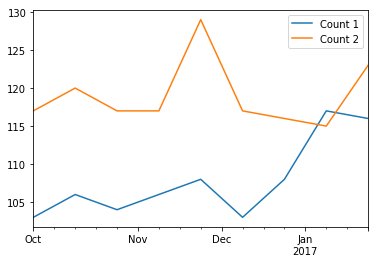

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot();